In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
%matplotlib inline

In [3]:
# utils

def load_image(filename, as_gray=False, as_float=False):
    if as_gray:
        a = np.asarray(Image.open(filename).convert('L'))
    else:
        a = np.asarray(Image.open(filename))
    if as_float:
        return a.astype(np.float) / 255
    else:
        return a

def display_image(im, as_gray=False, title=None):
    plt.figure(figsize=(9,4))
    if as_gray:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    if title is not None:
        plt.title(title)

def display_vec(v, title=None):
    plt.figure(figsize=(9,4))
    plt.plot(v)
    if title is not None:
        plt.title(title)

In [5]:
# syntax examples
im = np.zeros((10, 10), dtype=np.uint8)

range(10) # 0..9
range(1,10) # 1..9

# loop in image
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        v = im[i,j]

# create vector, matrix
np.zeros((3,), dtype=int)
np.zeros((3,4), dtype=int)

# get element count
im.size

# define function
def f(arg):
    return 0

# Segment drawing

In [ ]:
# define a function that draws a segment, with dx>0 and dy>0 and dy<dx
#   first with float calcs: draw_seg(im, p1, p2)
#   then with integer only: draw_seg_bresenham(im, p1, p2)

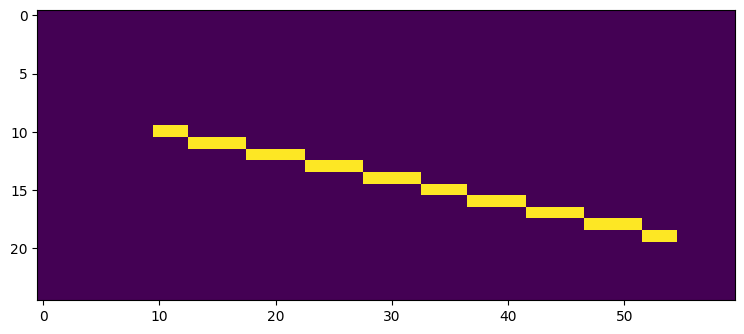

In [14]:
def draw_seg(im, p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    dx = x2 - x1
    dy = y2 - y1
    assert(dx>0 and dy>0 and dy<dx)
    for x in range(x1, x2+1):
        y = int(round(y1+dy/dx*(x-x1)))
        im[y,x] = 1

im = np.zeros([25, 60], dtype=int)

im1 = im.copy()
draw_seg(im1, (10, 10), (54, 19))
display_image(im1)

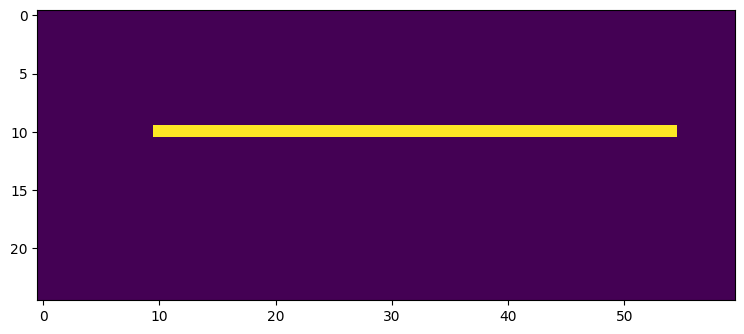

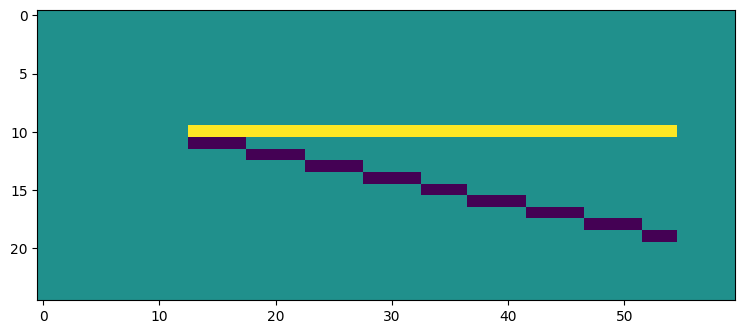

In [20]:
def draw_seg_bresenham(im, p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    dx = x2 - x1
    dy = y2 - y1
    assert(dx>0 and dy>0 and dy<dx)
    x = x1
    y = y1
    im[y,x] = 1
    e = 0
    e1 = dy/dx
    e2 = -1.0
    while x < x2:
        x = x + 1
        y = y
        if (e + e1) >= 0.5:
            e += e2
            y += 1
        im[y,x] = 1

im2 = im.copy()
draw_seg_bresenham(im2, (10, 10), (54, 19))
display_image(im2)

display_image(im2 - im1)